In [24]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [466]:
# CDC, KCDC load

CDC = pd.read_csv('./data/ILINet_CDC.csv', index_col=0)
KCDC = pd.read_csv('./data/influenza_KCDC.csv', index_col=0)
ASPREN = pd.read_csv('./data/ASPREN_AU.csv', index_col=0)

In [467]:
# CDC, KCDC normalization

# CDC

CDC_norm = pd.concat([s for c, s in CDC.items()], ignore_index=True)
CDC_norm = CDC_norm.dropna().values.reshape(-1,1)

# CDC_scaler = MinMaxScaler()
with open('./data/v2/CDC_scaler.pkl', 'rb') as f:
    CDC_scaler = pickle.load(f)
CDC_scaler.fit(CDC_norm)
CDC_norm = np.array([l for c, l in CDC.items()]).T
CDC_norm = pd.DataFrame(CDC_scaler.transform(CDC_norm), 
                         columns=CDC.columns,
                         index=CDC.index)

# 53주차 값이 없는 경우 52주와 1주차의 평균으로 채움
CDC_norm.loc[53, CDC_norm.loc[53][CDC_norm.loc[53].isna()].index[:-1]] = (
    (CDC_norm.loc[52, CDC_norm.loc[53][CDC_norm.loc[53].isna()].index[:-1]].values +
    CDC_norm[[str(y) for y in np.int64(CDC_norm.loc[53][CDC_norm.loc[53].isna()].index[:-1].values) + 1]].loc[1].values) / 2
)

# with open('./data/v2/CDC_scaler.pkl', 'wb') as f:
#     pickle.dump(CDC_scaler, f)
    
# KCDC

KCDC_norm = pd.concat([s for c, s in KCDC.items()], ignore_index=True)
KCDC_norm = KCDC_norm.dropna().values.reshape(-1,1)

# KCDC_scaler = MinMaxScaler()
with open('./data/v2/KCDC_scaler.pkl', 'rb') as f:
    KCDC_scaler = pickle.load(f)
KCDC_scaler.fit(KCDC_norm)
KCDC_norm = np.array([l for c, l in KCDC.items()]).T
KCDC_norm = pd.DataFrame(KCDC_scaler.transform(KCDC_norm), 
                         columns=KCDC.columns,
                         index=KCDC.index)

# 53주차 값이 없는 경우 52주와 1주차의 평균으로 채움
KCDC_norm.loc[53, KCDC_norm.loc[53][KCDC_norm.loc[53].isna()].index[:-1]] = (
    (KCDC_norm.loc[52, KCDC_norm.loc[53][KCDC_norm.loc[53].isna()].index[:-1]].values +
    KCDC_norm[[str(y) for y in np.int64(KCDC_norm.loc[53][KCDC_norm.loc[53].isna()].index[:-1].values) + 1]].loc[1].values) / 2
)

# with open('./data/v2/KCDC_scaler.pkl', 'wb') as f:
#     pickle.dump(KCDC_scaler, f)

# ASPREN

ASPREN_norm = pd.concat([s for c, s in ASPREN.items()], ignore_index=True)
ASPREN_norm = ASPREN_norm.dropna().values.reshape(-1,1)

# ASPREN_scaler = MinMaxScaler()
with open('./data/v2/ASPREN_scaler.pkl', 'rb') as f:
    ASPREN_scaler = pickle.load(f)
ASPREN_scaler.fit(ASPREN_norm)
ASPREN_norm = np.array([l for c, l in ASPREN.items()]).T
ASPREN_norm = pd.DataFrame(ASPREN_scaler.transform(ASPREN_norm), 
                         columns=ASPREN.columns,
                         index=ASPREN.index)

# 53주차 값이 없는 경우 52주와 1주차의 평균으로 채움
ASPREN_norm.loc[53, ASPREN_norm.loc[53][ASPREN_norm.loc[53].isna()].index[:-1]] = (
    (ASPREN_norm.loc[52, ASPREN_norm.loc[53][ASPREN_norm.loc[53].isna()].index[:-1]].values +
    ASPREN_norm[[str(y) for y in np.int64(ASPREN_norm.loc[53][ASPREN_norm.loc[53].isna()].index[:-1].values) + 1]].loc[1].values) / 2
)

# with open('./data/v2/ASPREN_scaler.pkl', 'wb') as f:
#     pickle.dump(ASPREN_scaler, f)

In [142]:
# US, KR related words by word2vec

with open('./data/v2/US_related_1000.pkl', 'rb') as f:
    US_related_words = pickle.load(f)
with open('./data/v2/KR_related_1000.pkl', 'rb') as f:
    KR_related_words = pickle.load(f)

In [215]:
# US trends, KR News/SNS/Trends load

US_trends = pd.read_csv('./data/v2/US_trends.csv', index_col=0)
AU_trends = pd.read_csv('./data/v2/AU_trends.csv', index_col=0)

KR_news = pd.read_csv('./data/v2/KR_news.csv', index_col=0)
KR_sns = pd.read_csv('./data/v2/KR_sns.csv', index_col=0)
KR_trends = pd.read_csv('./data/v2/KR_trends.csv', index_col=0)

In [216]:
# normalization

minmax_scaler = MinMaxScaler()

minmax_scaler.fit(US_trends[[c for c in US_trends.columns if c != 'weeks']])
US_trends_norm = pd.DataFrame(minmax_scaler.transform(US_trends[[c for c in US_trends.columns if c != 'weeks']]),
                              columns=[c for c in US_trends.columns if c != 'weeks'],
                              index=US_trends.index)
US_trends_norm.insert(loc=0, column='weeks', value=US_trends['weeks'])

minmax_scaler.fit(AU_trends[[c for c in AU_trends.columns if c != 'weeks']])
AU_trends_norm = pd.DataFrame(minmax_scaler.transform(AU_trends[[c for c in AU_trends.columns if c != 'weeks']]),
                              columns=[c for c in AU_trends.columns if c != 'weeks'],
                              index=AU_trends.index)
AU_trends_norm.insert(loc=0, column='weeks', value=AU_trends['weeks'])

minmax_scaler.fit(KR_news[[c for c in KR_news.columns if c != 'weeks']])
KR_news_norm = pd.DataFrame(minmax_scaler.transform(KR_news[[c for c in KR_news.columns if c != 'weeks']]),
                              columns=[c for c in KR_news.columns if c != 'weeks'],
                              index=KR_news.index)
KR_news_norm.insert(loc=0, column='weeks', value=KR_news['weeks'])

minmax_scaler.fit(KR_sns[[c for c in KR_sns.columns if c != 'weeks']])
KR_sns_norm = pd.DataFrame(minmax_scaler.transform(KR_sns[[c for c in KR_sns.columns if c != 'weeks']]),
                              columns=[c for c in KR_sns.columns if c != 'weeks'],
                              index=KR_sns.index)
KR_sns_norm.insert(loc=0, column='weeks', value=KR_sns['weeks'])

minmax_scaler.fit(KR_trends[[c for c in KR_trends.columns if c != 'weeks']])
KR_trends_norm = pd.DataFrame(minmax_scaler.transform(KR_trends[[c for c in KR_trends.columns if c != 'weeks']]),
                              columns=[c for c in KR_trends.columns if c != 'weeks'],
                              index=KR_trends.index)
KR_trends_norm.insert(loc=0, column='weeks', value=KR_trends['weeks'])

In [217]:
# lag load

US_trends_lag = pd.read_csv('./data/v2/US_trends_lag.csv', index_col=0)
AU_trends_lag = pd.read_csv('./data/v2/AU_trends_lag.csv', index_col=0)

KR_news_lag = pd.read_csv('./data/v2/KR_news_lag.csv', index_col=0)
KR_sns_lag = pd.read_csv('./data/v2/KR_sns_lag.csv', index_col=0)
KR_trends_lag = pd.read_csv('./data/v2/KR_trends_lag.csv', index_col=0)

In [479]:
# max lag load

US_trends_max_lag = pd.read_csv('./data/v2/US_trends_max_lag.csv', index_col=0)
AU_trends_max_lag = pd.read_csv('./data/v2/AU_trends_max_lag.csv', index_col=0)

KR_news_max_lag = pd.read_csv('./data/v2/KR_news_max_lag.csv', index_col=0)
KR_sns_max_lag = pd.read_csv('./data/v2/KR_sns_max_lag.csv', index_col=0)
KR_trends_max_lag = pd.read_csv('./data/v2/KR_trends_max_lag.csv', index_col=0)

In [673]:
# Model performance load

US_perform = pd.read_csv('./data/v2/US_perform4.csv', index_col=0)
AU_perform = pd.read_csv('./data/v2/AU_perform4.csv', index_col=0)
KR_perform = pd.read_csv('./data/v2/KR_perform4.csv', index_col=0)

In [674]:
# Model prediction load

with open('./data/v2/US_predict4.pkl', 'rb') as f:
    US_predict = pickle.load(f)
with open('./data/v2/AU_predict4.pkl', 'rb') as f:
    AU_predict = pickle.load(f)
with open('./data/v2/KR_predict4.pkl', 'rb') as f:
    KR_predict = pickle.load(f)

In [663]:
# US perform table

US_perform_mini = US_perform[['total_rmse_1', 'total_mape_1', 'total_corr_1',
                'total_rmse_5', 'total_mape_5', 'total_corr_5',
                'total_rmse_10', 'total_mape_10', 'total_corr_10']].loc[['Basic-LSTM(US)', 'DEFSI(US)', 'Seq2Seq(US)', 'ME-T(US)']].round(3)
US_perform_mini

,total_rmse_1,total_mape_1,total_corr_1,total_rmse_5,total_mape_5,total_corr_5,total_rmse_10,total_mape_10,total_corr_10
Basic-LSTM(US),9.756,28.068,0.871,14.934,48.011,0.685,20.230,72.457,0.143
DEFSI(US),8.797,18.924,0.916,14.792,45.640,0.732,21.198,85.853,0.209
Seq2Seq(US),9.054,21.690,0.923,13.997,40.412,0.754,14.069,46.150,0.702
ME-T(US),8.876,23.363,0.880,10.239,24.922,0.845,12.166,31.732,0.755


In [668]:
US_perform_improve = US_perform_mini.copy()
for col in US_perform_mini.columns:
    for row in US_perform_mini.index:
        if 'corr' in col:
            US_perform_improve.loc[row, col] = (
                (US_perform_mini.loc[row, col] - US_perform_mini.loc['Basic-LSTM(US)', col])
            / US_perform_mini.loc['Basic-LSTM(US)', col])
        else:
            US_perform_improve.loc[row, col] = (
                (US_perform_mini.loc['Basic-LSTM(US)', col] - US_perform_mini.loc[row, col])
            / US_perform_mini.loc['Basic-LSTM(US)', col])
US_perform_improve.apply(lambda x: x*100).round(1)

,total_rmse_1,total_mape_1,total_corr_1,total_rmse_5,total_mape_5,total_corr_5,total_rmse_10,total_mape_10,total_corr_10
Basic-LSTM(US),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DEFSI(US),9.8,32.6,5.2,1.0,4.9,6.9,-4.8,-18.5,46.2
Seq2Seq(US),7.2,22.7,6.0,6.3,15.8,10.1,30.5,36.3,390.9
ME-T(US),9.0,16.8,1.0,31.4,48.1,23.4,39.9,56.2,428.0


In [669]:
# AU perform table

AU_perform_mini = AU_perform[['total_rmse_1', 'total_mape_1', 'total_corr_1',
                'total_rmse_5', 'total_mape_5', 'total_corr_5',
                'total_rmse_10', 'total_mape_10', 'total_corr_10']].loc[['Basic-LSTM(AU)', 'DEFSI(AU)', 'Seq2Seq(AU)', 'ME-T(AU)']].round(3)
AU_perform_mini

,total_rmse_1,total_mape_1,total_corr_1,total_rmse_5,total_mape_5,total_corr_5,total_rmse_10,total_mape_10,total_corr_10
Basic-LSTM(AU),1.812,31.564,0.866,3.006,52.046,0.595,4.119,76.335,0.145
DEFSI(AU),1.612,22.886,0.910,2.784,31.722,0.778,4.748,69.161,0.511
Seq2Seq(AU),1.688,26.924,0.934,2.430,53.014,0.810,2.981,121.504,0.624
ME-T(AU),1.766,22.802,0.876,1.974,24.843,0.887,2.962,30.987,0.775


In [670]:
AU_perform_improve = AU_perform_mini.copy()
for col in AU_perform_mini.columns:
    for row in AU_perform_mini.index:
        if 'corr' in col:
            AU_perform_improve.loc[row, col] = (
                (AU_perform_mini.loc[row, col] - AU_perform_mini.loc['Basic-LSTM(AU)', col])
            / AU_perform_mini.loc['Basic-LSTM(AU)', col])
        else:
            AU_perform_improve.loc[row, col] = (
                (AU_perform_mini.loc['Basic-LSTM(AU)', col] - AU_perform_mini.loc[row, col])
            / AU_perform_mini.loc['Basic-LSTM(AU)', col])
AU_perform_improve.apply(lambda x: x*100).round(1)

,total_rmse_1,total_mape_1,total_corr_1,total_rmse_5,total_mape_5,total_corr_5,total_rmse_10,total_mape_10,total_corr_10
Basic-LSTM(AU),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DEFSI(AU),11.0,27.5,5.1,7.4,39.1,30.8,-15.3,9.4,252.4
Seq2Seq(AU),6.8,14.7,7.9,19.2,-1.9,36.1,27.6,-59.2,330.3
ME-T(AU),2.5,27.8,1.2,34.3,52.3,49.1,28.1,59.4,434.5


In [675]:
# KR perform table

KR_perform_mini = KR_perform[['total_rmse_1', 'total_mape_1', 'total_corr_1', 
            'total_rmse_5', 'total_mape_5', 'total_corr_5', 
            'total_rmse_10', 'total_mape_10', 'total_corr_10', ]].loc[['Basic-LSTM', 'DEFSI', 'Seq2Seq', 'ME-N', 'ME-S', 'ME-T']].round(3)
KR_perform_mini

,total_rmse_1,total_mape_1,total_corr_1,total_rmse_5,total_mape_5,total_corr_5,total_rmse_10,total_mape_10,total_corr_10
Basic-LSTM,8.535,36.197,0.856,15.389,100.380,0.407,16.152,102.696,0.256
DEFSI,4.606,19.391,0.966,10.381,67.938,0.834,24.034,180.370,0.371
Seq2Seq,6.901,24.792,0.925,10.401,53.300,0.838,22.899,88.296,0.380
ME-N,8.607,37.481,0.857,7.176,31.585,0.906,12.292,65.160,0.717
ME-S,7.494,42.335,0.891,5.851,29.109,0.936,10.339,40.036,0.800
ME-T,9.169,95.028,0.836,6.524,43.926,0.920,10.371,34.659,0.824


In [676]:
KR_perform_improve = KR_perform_mini.copy()
for col in KR_perform_mini.columns:
    for row in KR_perform_mini.index:
        if 'corr' in col:
            KR_perform_improve.loc[row, col] = (
                (KR_perform_mini.loc[row, col] - KR_perform_mini.loc['Basic-LSTM', col])
            / KR_perform_mini.loc['Basic-LSTM', col])
        else:
            KR_perform_improve.loc[row, col] = (
                (KR_perform_mini.loc['Basic-LSTM', col] - KR_perform_mini.loc[row, col])
            / KR_perform_mini.loc['Basic-LSTM', col])
KR_perform_improve.apply(lambda x: x*100).round(1)

,total_rmse_1,total_mape_1,total_corr_1,total_rmse_5,total_mape_5,total_corr_5,total_rmse_10,total_mape_10,total_corr_10
Basic-LSTM,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
DEFSI,46.0,46.4,12.9,32.5,32.3,104.9,-48.8,-75.6,44.9
Seq2Seq,19.1,31.5,8.1,32.4,46.9,105.9,-41.8,14.0,48.4
ME-N,-0.8,-3.5,0.1,53.4,68.5,122.6,23.9,36.6,180.1
ME-S,12.2,-17.0,4.1,62.0,71.0,130.0,36.0,61.0,212.5
ME-T,-7.4,-162.5,-2.3,57.6,56.2,126.0,35.8,66.3,221.9


In [485]:
# basic setting

plt.rcParams['font.family'] = 'Times New Roman'

look_back = 8
look_ahead = 10

max_lag = 14
collect_err = 22

val_size = 46 #40 
test_size = 58 #58

available_weeks = KR_trends_norm['weeks'].values[collect_err+max_lag+look_back:-look_ahead+1]
start_week = int(available_weeks[0].split('-')[1])
end_week = int(available_weeks[-1].split('-')[1])

US_target_truth = (CDC_norm.loc[start_week:52, '2018'].tolist() + CDC_norm.loc[:52, '2019'].tolist()
                    + CDC_norm.loc[:end_week+look_ahead, '2020'].tolist())
AU_target_truth = (ASPREN_norm.loc[start_week:52, '2018'].tolist() + ASPREN_norm.loc[:52, '2019'].tolist()
                    + ASPREN_norm.loc[:end_week+look_ahead, '2020'].tolist())
KR_target_truth = (KCDC_norm.loc[start_week:52, '2018'].tolist() + KCDC_norm.loc[:52, '2019'].tolist()
                    + KCDC_norm.loc[:end_week+look_ahead, '2020'].tolist())
print(len(US_target_truth), len(AU_target_truth), len(KR_target_truth))

99 99 99


In [486]:
class Evaluate:
    @classmethod
    def RMSE(cls, x, y):
        x, y = np.array(x).reshape(-1), np.array(y).reshape(-1)
        return mean_squared_error(x, y) ** 0.5
    
    @classmethod
    def MAPE(cls, x, y):
        x, y = np.array(x).reshape(-1), np.array(y).reshape(-1)
        return np.mean(np.abs((y - x) / y)) * 100
    
    @classmethod
    def CORR(cls, x, y):
        x, y = np.array(x).reshape(-1), np.array(y).reshape(-1)
        return stats.pearsonr(x, y)[0]
    
    @classmethod
    def evaluate(cls, truth, prd, look_ahead):
        rmse, mape, corr = [], [], []
        for ahead in range(look_ahead):
            rmse.append(cls.RMSE(truth[ahead:len(prd)+ahead], prd[:, ahead]))
            mape.append(cls.MAPE(truth[ahead:len(prd)+ahead], prd[:, ahead]))
            corr.append(cls.CORR(truth[ahead:len(prd)+ahead], prd[:, ahead]))
        return rmse, mape, corr

In [284]:
ticks_weeks = list(available_weeks) + ['20-12', '20-13', '20-14', '20-15', '20-16', '20-17', 
                                 '20-18', '20-19', '20-20', '20-21', '20-22']
ticks_weeks = np.array(ticks_weeks)

In [426]:
print('KCDC(max):', KCDC.max().index[KCDC.max().argmax()], '/',
      KCDC.index[KCDC[KCDC.max().index[KCDC.max().argmax()]].argmax()], '/',
      KCDC.max()[KCDC.max().argmax()])
print('KCDC(min):', KCDC.min().index[KCDC.min().argmin()], '/',
      KCDC.index[KCDC[KCDC.min().index[KCDC.min().argmin()]].argmin()], '/',
      KCDC.min()[KCDC.min().argmin()])
print('KCDC(mean)', KCDC.mean().mean().round(2))
print('CDC(max):', CDC.max().index[CDC.max().argmax()], '/',
      CDC.index[CDC[CDC.max().index[CDC.max().argmax()]].argmax()], '/',
      CDC.max()[CDC.max().argmax()]*10)
print('CDC(min):', CDC.min().index[CDC.min().argmin()], '/',
      CDC.index[CDC[CDC.min().index[CDC.min().argmin()]].argmin()], '/',
      CDC.min()[CDC.min().argmin()]*10)
print('CDC(mean)', CDC.mean().mean().round(2)*10)
print('ASPREN(max):', ASPREN.max().index[ASPREN.max().argmax()], '/',
      ASPREN.index[ASPREN[ASPREN.max().index[ASPREN.max().argmax()]].argmax()], '/',
      ASPREN.max()[ASPREN.max().argmax()])
print('ASPREN(min):', ASPREN.min().index[ASPREN.min().argmin()], '/',
      ASPREN.index[ASPREN[ASPREN.min().index[ASPREN.min().argmin()]].argmin()], '/',
      ASPREN.min()[ASPREN.min().argmin()])
print('ASPREN(mean)', ASPREN.mean().mean().round(2))

KCDC(max): 2016 / 52 / 86.2
KCDC(min): 2014 / 34 / 1.3
KCDC(mean) 10.7
CDC(max): 2018 / 5 / 77.809
CDC(min): 2011 / 31 / 6.447430000000001
CDC(mean) 21.200000000000003
ASPREN(max): 2017 / 33 / 25.55
ASPREN(min): 2015 / 6 / 0.46
ASPREN(mean) 5.81


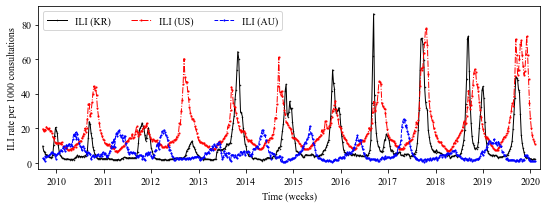

In [529]:
plt.figure(figsize=(9, 3))
plt.plot(KCDC.values.T[:, :-1].reshape(11*52)[:-31], c='k', ls='-', marker='.', markersize=1, linewidth=1,
        label='ILI (KR)')
plt.plot(CDC.values.T[:, :-1].reshape(11*52)[:-31], c='red', ls='-.', marker='s', markersize=1, linewidth=1,
        label='ILI (US)')
plt.plot(ASPREN.values.T[:, :-1].reshape(11*52)[:-31], c='blue', ls='--', marker='D', markersize=1, linewidth=1,
        label='ILI (AU)')
plt.xticks(np.arange(15, 541, 52), CDC.columns)
plt.xlabel('Time (weeks)')
plt.ylabel('ILI rate per 1000 consultations')
plt.xlim(0-5, 541+5)
plt.legend(ncol=3)
plt.savefig('./image/v2/ILI_by_country.png', dpi=300, bbox_inches='tight')
plt.show()

ahead: 1


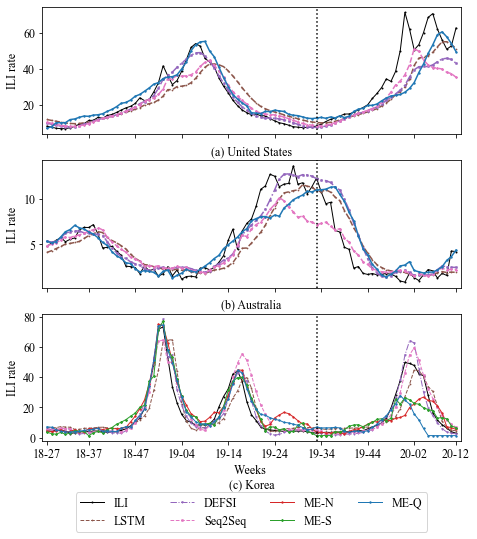

ahead: 5


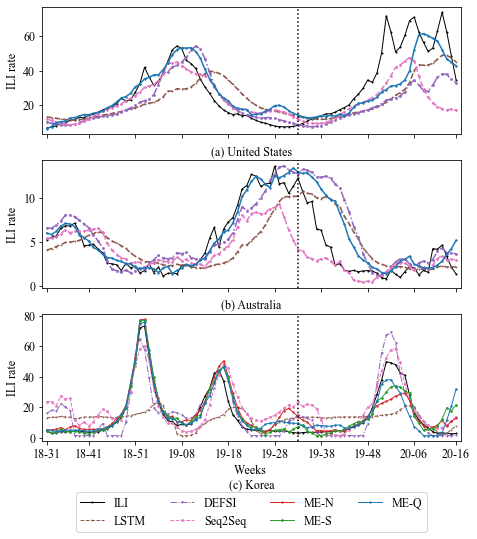

ahead: 10


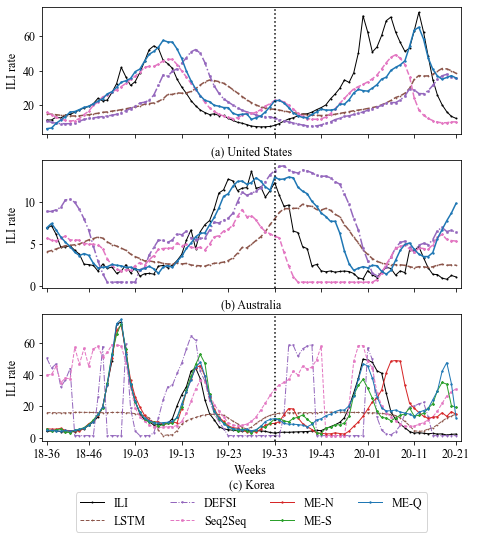

In [832]:
# 3개 국가의 1, 5, 10주 예측 그래프

plt.rcParams.update({'font.size': 12})

for ahead in [1, 5, 10]:
    print('ahead:', ahead)
    markers = ['.', 's', 'D', 'h']
    colors = ['tab:brown', 'tab:purple', 'tab:pink', 'tab:blue']
    line_styles = ['--', '-.', '--', '-']
    x_labels = ['week\n(a) ahead-', 'week\n(b) ahead-', 'week\n(c) ahead-']

    fig, axs = plt.subplots(3, 1, figsize=(7.5, 8))


    idx = 0
    axs[0].plot(CDC_scaler.inverse_transform(np.array(US_target_truth[ahead-1:-look_ahead+ahead-1]).reshape(-1,1)),
             c='k', ls='-', marker='.', markersize=2, linewidth=1, label='ILI (US)')
    for m in ['Basic-LSTM(US)', 'DEFSI(US)', 'Seq2Seq(US)', 'ME-T(US)']:
        prd = US_predict[m]
        if m == 'ME-T(US)':
            lbl = 'MEDIF-T(US)'
        else:
            lbl = m if m != 'Basic-LSTM(US)' else 'LSTM(US)'

        axs[0].plot(CDC_scaler.inverse_transform(prd[:, ahead-1].reshape(-1, 1)), label=lbl, c=colors[idx], ls=line_styles[idx],
                marker=markers[idx], markersize=1.5)
        idx += 1
    axs[0].set_xlim(0-1, 88+1)
    axs[0].set_ylabel('ILI rate')
    axs[0].set_xlabel('(a) United States')
    axs[0].set_xticks([0, 9, 19, 29, 39, 49, 59, 69, 79, 88])
    axs[0].set_xticklabels([])
    # axs[0].set_yticks([20, 40, 60])
    # axs[0].set_yticklabels([20, 40, 60], fontsize=7)
    axs[0].axvline(x=test_size-ahead+1, ls=':', c='k')
    # axs[0].legend(ncol=6)

    idx = 0
    axs[1].plot(ASPREN_scaler.inverse_transform(np.array(AU_target_truth[ahead-1:-look_ahead+ahead-1]).reshape(-1,1)),
             c='k', ls='-', marker='.', markersize=2, linewidth=1, label='ILI (AU)')
    for m in ['Basic-LSTM(AU)', 'DEFSI(AU)', 'Seq2Seq(AU)', 'ME-T(AU)']:
        prd = AU_predict[m]
        if m == 'ME-T(AU)':
            lbl = 'MEDIF-T(AU)'
        else:
            lbl = m if m != 'Basic-LSTM(AU)' else 'LSTM(AU)'

        axs[1].plot(ASPREN_scaler.inverse_transform(prd[:, ahead-1].reshape(-1, 1)), label=lbl, c=colors[idx], ls=line_styles[idx],
                marker=markers[idx], markersize=1.5)
        idx += 1
    axs[1].set_xlim(0-1, 88+1)
    # axs[1].set_ylim(0, 20)
    axs[1].set_ylabel('ILI rate')
    axs[1].set_xlabel('(b) Australia')
    axs[1].set_xticks([0, 9, 19, 29, 39, 49, 59, 69, 79, 88])
    axs[1].set_xticklabels([])
    # axs[1].set_yticks(np.arange(0, 20, 5))
    # axs[1].set_yticklabels(np.arange(0, 20, 5), fontsize=7)
    axs[1].axvline(x=test_size-ahead+1, ls=':', c='k')
    # axs[1].legend(ncol=8, fontsize=7, loc='upper left')

    markers = ['.', 'v', 's', 'p', 'D', 'h', '*']
    colors = ['tab:brown', 'tab:purple', 'tab:pink', 'tab:red', 'tab:green', 'tab:blue']
    line_styles = ['--', '-.', '--', '-', '-', '-']

    idx = 0
    axs[2].plot(KCDC_scaler.inverse_transform(np.array(KR_target_truth[ahead-1:-look_ahead+ahead-1]).reshape(-1,1)),
             c='k', ls='-', marker='.', markersize=2, linewidth=1, label='ILI (KR)')
    for m in ['Basic-LSTM', 'DEFSI', 'Seq2Seq', 'ME-N', 'ME-S', 'ME-T']:
        prd = KR_predict[m]
        if m == 'ME-T' or m == 'ME-N' or m == 'ME-S' or m == 'ME-A':
            lbl = 'MEDIF-' + m[-1]
        else:
            lbl = m if m != 'Basic-LSTM' else 'LSTM'
        lbl += '(KR)'

        axs[2].plot(KCDC_scaler.inverse_transform(prd[:, ahead-1].reshape(-1, 1)), label=lbl, c=colors[idx], ls=line_styles[idx],
                linewidth=1, marker=markers[idx], markersize=1.5)
        idx += 1
    axs[2].set_xlim(0-1, 88+1)
    # axs[2].set_ylim(0, 100)
    axs[2].set_ylabel('ILI rate')
    axs[2].set_xlabel('Weeks \n(c) Korea')
    axs[2].set_xticks([0, 9, 19, 29, 39, 49, 59, 69, 79, 88])
    axs[2].set_xticklabels(ticks_weeks[[_-1 for _ in range(ahead, len(KR_target_truth)+ahead, 10)]])
    # axs[2].set_yticks(np.arange(0, 100, 25))
    # axs[2].set_yticklabels(np.arange(0, 100, 25), fontsize=7)
    axs[2].axvline(x=test_size-ahead+1, ls=':', c='k')
    # axs[2].legend(ncol=8, fontsize=7)

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.35), ncol=4, 
               labels=['ILI', 'LSTM', 'DEFSI', 'Seq2Seq', 'ME-N', 'ME-S', 'ME-Q'])
    # plt.grid(True, ls='--')
    plt.savefig('./image/v2/' + str(ahead) + '-step-ahead_predict.png', dpi=300, bbox_inches='tight')
    plt.show()

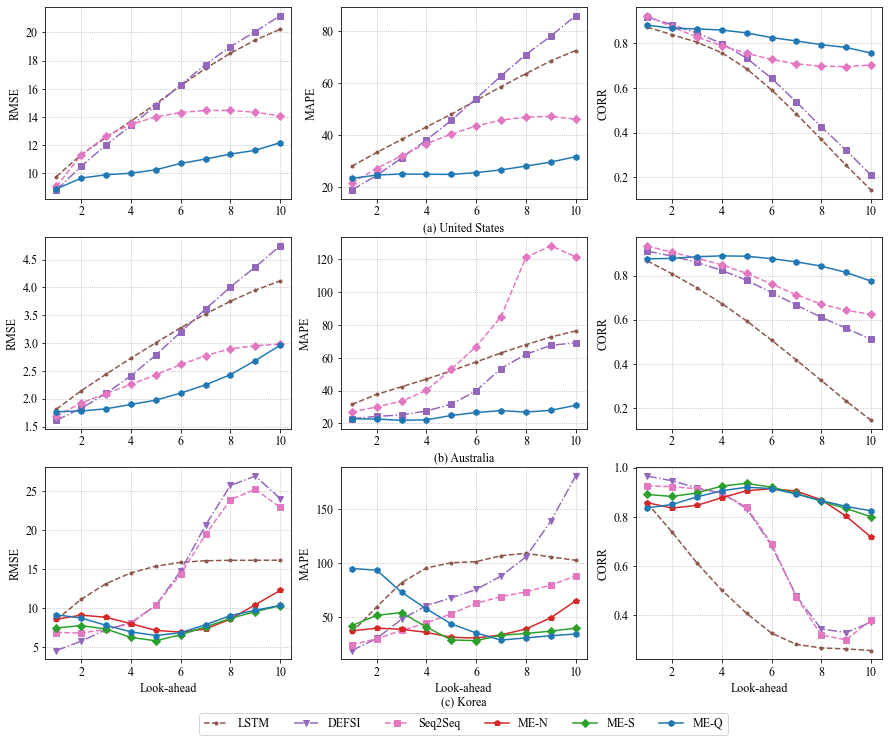

In [834]:
# 3개 국가의 1, 5, 10주 예측 그래프

markers = ['.', 's', 'D', 'h']
colors = ['tab:brown', 'tab:purple', 'tab:pink', 'tab:blue']
line_styles = ['--', '-.', '--', '-']
x_labels = ['week\n(a) ahead-', 'week\n(b) ahead-', 'week\n(c) ahead-']

fig, axs = plt.subplots(3, 3, figsize=(15, 12))

for col, ev in enumerate(['rmse', 'mape', 'corr']):
    target_df = US_perform[[c for c in US_perform if 'total' in c and ev in c]]
    for i, m in enumerate(['Basic-LSTM(US)', 'DEFSI(US)', 'Seq2Seq(US)', 'ME-T(US)']):
        axs[0, col].plot(target_df.T[m].values, label='MEDIF-' + m[3:], marker=markers[i], c=colors[i],
                ls=line_styles[i])
        axs[0, col].set_ylabel(ev.upper())
#         axs[0, col].set_xlabel('ahead')
        axs[0, col].set_xticks(range(1, 11, 2))
        axs[0, col].set_xticklabels(range(2, 12, 2))
        axs[0, col].grid(True, ls=':')
axs[0, 1].set_xlabel('(a) United States')
        
for col, ev in enumerate(['rmse', 'mape', 'corr']):
    target_df = AU_perform[[c for c in AU_perform if 'total' in c and ev in c]]
    for i, m in enumerate(['Basic-LSTM(AU)', 'DEFSI(AU)', 'Seq2Seq(AU)', 'ME-T(AU)']):
        axs[1, col].plot(target_df.T[m].values, label='MEDIF-' + m[3:], marker=markers[i], c=colors[i],
                ls=line_styles[i])
        axs[1, col].set_ylabel(ev.upper())
#         axs[1, col].set_xlabel('ahead')
        axs[1, col].set_xticks(range(1, 11, 2))
        axs[1, col].set_xticklabels(range(2, 12, 2))
        axs[1, col].grid(True, ls=':')
axs[1, 1].set_xlabel('(b) Australia')
        
markers = ['.', 'v', 's', 'p', 'D', 'h', '*']
colors = ['tab:brown', 'tab:purple', 'tab:pink', 'tab:red', 'tab:green', 'tab:blue']
line_styles = ['--', '-.', '--', '-', '-', '-']
for col, ev in enumerate(['rmse', 'mape', 'corr']):
    target_df = KR_perform[[c for c in KR_perform if 'total' in c and ev in c]]
    for i, m in enumerate(['Basic-LSTM', 'DEFSI', 'Seq2Seq', 'ME-N', 'ME-S', 'ME-T']):
        axs[2, col].plot(target_df.T[m].values, marker=markers[i], c=colors[i],
                ls=line_styles[i], label=m)
        axs[2, col].set_ylabel(ev.upper())
        axs[2, col].set_xlabel('Look-ahead')
        axs[2, col].set_xticks(range(1, 11, 2))
        axs[2, col].set_xticklabels(range(2, 12, 2))
        axs[2, col].grid(True, ls=':')
axs[2, 1].set_xlabel('Look-ahead\n(c) Korea')

plt.legend(loc='upper center', bbox_to_anchor=(-0.7, -0.25), ncol=6,
          labels=['LSTM', 'DEFSI', 'Seq2Seq', 'ME-N', 'ME-S', 'ME-Q'])
plt.savefig('./image/v2/All_perform_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

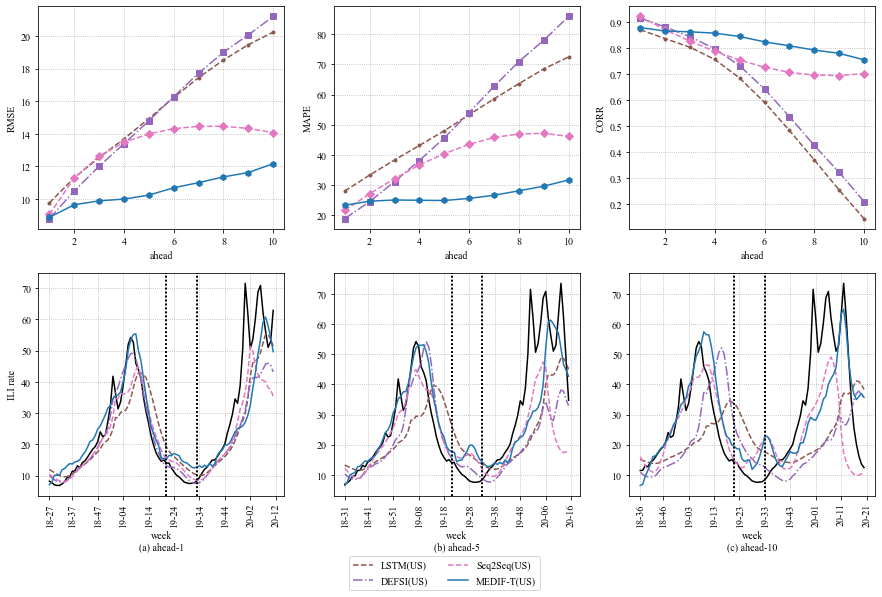

In [487]:
# US perform 비교 및 예측 그래프

markers = ['.', 's', 'D', 'h']
colors = ['tab:brown', 'tab:purple', 'tab:pink', 'tab:blue']
line_styles = ['--', '-.', '--', '-']
x_labels = ['week\n(a) ahead-', 'week\n(b) ahead-', 'week\n(c) ahead-']

fig, axs = plt.subplots(2, 3, figsize=(15, 9))
for col, ev in enumerate(['rmse', 'mape', 'corr']):
    target_df = US_perform[[c for c in US_perform if 'total' in c and ev in c]]
    for i, m in enumerate(['Basic-LSTM(US)', 'DEFSI(US)', 'Seq2Seq(US)', 'ME-T(US)']):
        axs[0, col].plot(target_df.T[m].values, label='MEDIF-' + m[3:], marker=markers[i], c=colors[i],
                ls=line_styles[i])
        axs[0, col].set_ylabel(ev.upper())
        axs[0, col].set_xlabel('ahead')
        axs[0, col].set_xticks(range(1, 11, 2))
        axs[0, col].set_xticklabels(range(2, 12, 2))
        axs[0, col].grid(True, ls=':')


for i, ahead in enumerate([1, 5, 10]):
    idx = 0
    axs[1, i].plot(CDC_scaler.inverse_transform(np.array(US_target_truth[ahead-1:-look_ahead+ahead-1]).reshape(-1,1)), c='k')
    for m in ['Basic-LSTM(US)', 'DEFSI(US)', 'Seq2Seq(US)', 'ME-T(US)']:
        prd = US_predict[m]
        if m == 'ME-T(US)':
            lbl = 'MEDIF-T(US)'
        else:
            lbl = m if m != 'Basic-LSTM(US)' else 'LSTM(US)'
            
        axs[1, i].plot(CDC_scaler.inverse_transform(prd[:, ahead-1].reshape(-1, 1)), label=lbl, c=colors[idx], ls=line_styles[idx])
        axs[1, i].set_xticks([0, 9, 19, 29, 39, 49, 59, 69, 79, 89])
#         axs[1, i].set_xticklabels(range(ahead, len(US_target_truth)+ahead, 10))
        axs[1, i].set_xticklabels(ticks_weeks[[_-1 for _ in range(ahead, len(KR_target_truth)+ahead, 10)]],
                                 rotation=90)
        axs[1, i].set_xlabel(x_labels[i] + str(ahead))
        axs[1, i].axvline(x=val_size-ahead+1, ls=':', c='k')
        axs[1, i].axvline(x=test_size-ahead+1, ls=':', c='k')
        legend_h, legend_l = axs[1, i].get_legend_handles_labels()
        axs[1, i].grid(True, ls=':')
        idx += 1
        
        if i == 0:
            axs[1, i].set_ylabel('ILI rate')

plt.legend(loc='upper center', bbox_to_anchor=(-0.75, -0.25), ncol=2)
# plt.savefig('./image/v2/US_comparision_models.png', dpi=300, bbox_inches='tight')
plt.show()

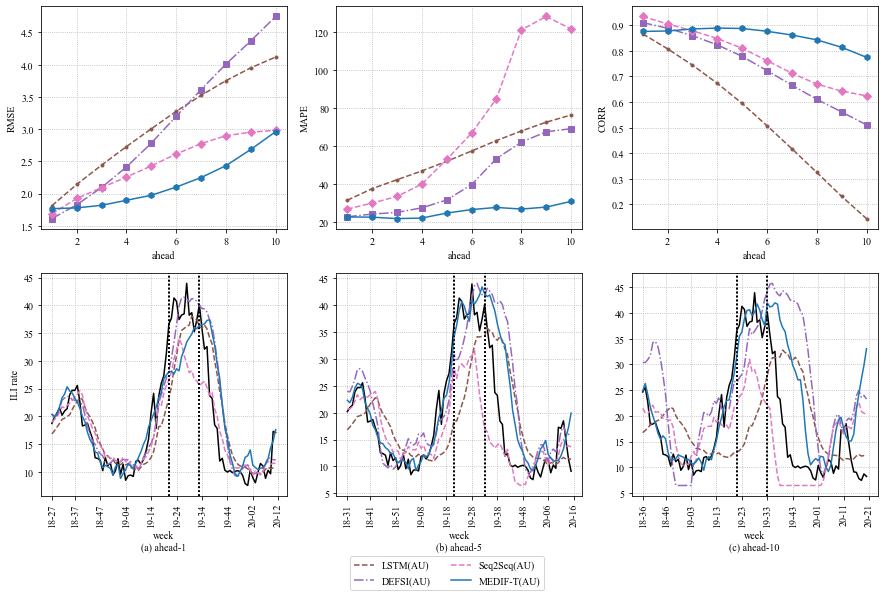

In [488]:
# AU perform 비교 및 예측 그래프

markers = ['.', 's', 'D', 'h']
colors = ['tab:brown', 'tab:purple', 'tab:pink', 'tab:blue']
line_styles = ['--', '-.', '--', '-']
x_labels = ['week\n(a) ahead-', 'week\n(b) ahead-', 'week\n(c) ahead-']

fig, axs = plt.subplots(2, 3, figsize=(15, 9))
for col, ev in enumerate(['rmse', 'mape', 'corr']):
    target_df = AU_perform[[c for c in AU_perform if 'total' in c and ev in c]]
    for i, m in enumerate(['Basic-LSTM(AU)', 'DEFSI(AU)', 'Seq2Seq(AU)', 'ME-T(AU)']):
        axs[0, col].plot(target_df.T[m].values, label='MEDIF-' + m[3:], marker=markers[i], c=colors[i],
                ls=line_styles[i])
        axs[0, col].set_ylabel(ev.upper())
        axs[0, col].set_xlabel('ahead')
        axs[0, col].set_xticks(range(1, 11, 2))
        axs[0, col].set_xticklabels(range(2, 12, 2))
        axs[0, col].grid(True, ls=':')


for i, ahead in enumerate([1, 5, 10]):
    idx = 0
    axs[1, i].plot(CDC_scaler.inverse_transform(np.array(AU_target_truth[ahead-1:-look_ahead+ahead-1]).reshape(-1,1)), c='k')
    for m in ['Basic-LSTM(AU)', 'DEFSI(AU)', 'Seq2Seq(AU)', 'ME-T(AU)']:
        prd = AU_predict[m]
        if m == 'ME-T(AU)':
            lbl = 'MEDIF-T(AU)'
        else:
            lbl = m if m != 'Basic-LSTM(AU)' else 'LSTM(AU)'
            
        axs[1, i].plot(CDC_scaler.inverse_transform(prd[:, ahead-1].reshape(-1, 1)), label=lbl, c=colors[idx], ls=line_styles[idx])
        axs[1, i].set_xticks([0, 9, 19, 29, 39, 49, 59, 69, 79, 89])
#         axs[1, i].set_xticklabels(range(ahead, len(AU_target_truth)+ahead, 10))
        axs[1, i].set_xticklabels(ticks_weeks[[_-1 for _ in range(ahead, len(KR_target_truth)+ahead, 10)]],
                                 rotation=90)
        axs[1, i].set_xlabel(x_labels[i] + str(ahead))
        axs[1, i].axvline(x=val_size-ahead+1, ls=':', c='k')
        axs[1, i].axvline(x=test_size-ahead+1, ls=':', c='k')
        legend_h, legend_l = axs[1, i].get_legend_handles_labels()
        axs[1, i].grid(True, ls=':')
        idx += 1
        
        if i == 0:
            axs[1, i].set_ylabel('ILI rate')

plt.legend(loc='upper center', bbox_to_anchor=(-0.75, -0.25), ncol=2)
# plt.savefig('./image/v2/AU_comparision_models.png', dpi=300, bbox_inches='tight')
plt.show()

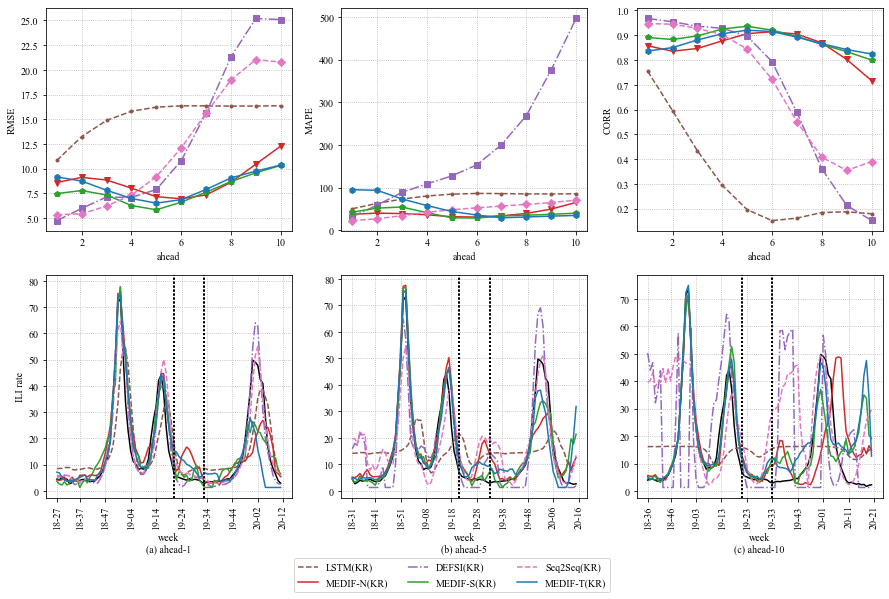

In [489]:
# KR perform 비교 및 예측 그래프

markers = ['.', 'v', 's', 'p', 'D', 'h', '*']
colors = ['tab:brown', 'tab:red', 'tab:purple', 'tab:green', 'tab:pink', 'tab:blue', 'tab:olive']
line_styles = ['--', '-', '-.', '-', '--', '-', '-']
x_labels = ['week\n(a) ahead-', 'week\n(b) ahead-', 'week\n(c) ahead-']

fig, axs = plt.subplots(2, 3, figsize=(15, 9))
for col, ev in enumerate(['rmse', 'mape', 'corr']):
    target_df = KR_perform[[c for c in KR_perform if 'total' in c and ev in c]]
    for i, m in enumerate(['Basic-LSTM', 'ME-N', 'DEFSI', 'ME-S', 'Seq2Seq', 'ME-T']):
        axs[0, col].plot(target_df.T[m].values, marker=markers[i], c=colors[i],
                ls=line_styles[i])
        axs[0, col].set_ylabel(ev.upper())
        axs[0, col].set_xlabel('ahead')
        axs[0, col].set_xticks(range(1, 11, 2))
        axs[0, col].set_xticklabels(range(2, 12, 2))
        axs[0, col].grid(True, ls=':')


for i, ahead in enumerate([1, 5, 10]):
    idx = 0
    axs[1, i].plot(KCDC_scaler.inverse_transform(np.array(KR_target_truth[ahead-1:-look_ahead+ahead-1]).reshape(-1,1)), c='k')
    for m in ['Basic-LSTM', 'ME-N', 'DEFSI', 'ME-S', 'Seq2Seq', 'ME-T']:
        prd = KR_predict[m]
        if m == 'ME-T' or m == 'ME-N' or m == 'ME-S' or m == 'ME-A':
            lbl = 'MEDIF-' + m[-1]
        else:
            lbl = m if m != 'Basic-LSTM' else 'LSTM'
        lbl += '(KR)'
            
        axs[1, i].plot(KCDC_scaler.inverse_transform(prd[:, ahead-1].reshape(-1, 1)), label=lbl, c=colors[idx], ls=line_styles[idx])
        axs[1, i].set_xticks([0, 9, 19, 29, 39, 49, 59, 69, 79, 89])
#         axs[1, i].set_xticklabels(range(ahead, len(KR_target_truth)+ahead, 10))
        axs[1, i].set_xticklabels(ticks_weeks[[_-1 for _ in range(ahead, len(KR_target_truth)+ahead, 10)]],
                                 rotation=90)
        axs[1, i].set_xlabel(x_labels[i] + str(ahead))
        axs[1, i].axvline(x=val_size-ahead+1, ls=':', c='k')
        axs[1, i].axvline(x=test_size-ahead+1, ls=':', c='k')
        legend_h, legend_l = axs[1, i].get_legend_handles_labels()
        axs[1, i].grid(True, ls=':')
        idx += 1
        
        if i == 0:
            axs[1, i].set_ylabel('ILI rate')

plt.legend(loc='upper center', bbox_to_anchor=(-0.75, -0.25), ncol=3)
# plt.savefig('./image/v2/KR_comparison_models.png', dpi=300, bbox_inches='tight')
plt.show()

In [180]:
US_trends_lag_coef = {}
US_trends_lag_sorted = {}
for word in US_trends_lag:
    if not np.isnan(US_trends_lag[word].max()):
        US_trends_lag_coef[word] = (US_trends_lag[word].argmax(), US_trends_lag[word].max())
US_trends_lag_sorted = sorted(US_trends_lag_coef.items(), key=(lambda x: x[1][0]), reverse=True)
US_trends_lag_sorted = [US_trends_lag[w].values for w, l in US_trends_lag_sorted]
        
KR_news_lag_coef = {}
KR_news_lag_sorted = {}
for word in KR_news_lag:
    if not np.isnan(KR_news_lag[word].max()):
        KR_news_lag_coef[word] = (KR_news_lag[word].argmax(), KR_news_lag[word].max())
KR_news_lag_sorted = sorted(KR_news_lag_coef.items(), key=(lambda x: x[1][0]), reverse=True)
KR_news_lag_sorted = [KR_news_lag[w].values for w, l in KR_news_lag_sorted]
        
KR_sns_lag_coef = {}
KR_sns_lag_sorted = {}
for word in KR_sns_lag:
    if not np.isnan(KR_sns_lag[word].max()):
        KR_sns_lag_coef[word] = (KR_sns_lag[word].argmax(), KR_sns_lag[word].max())
KR_sns_lag_sorted = sorted(KR_sns_lag_coef.items(), key=(lambda x: x[1][0]), reverse=True)
KR_sns_lag_sorted = [KR_sns_lag[w].values for w, l in KR_sns_lag_sorted]
        
KR_trends_lag_coef = {}
KR_trends_lag_sorted = {}
for word in KR_trends_lag:
    if not np.isnan(KR_trends_lag[word].max()):
        KR_trends_lag_coef[word] = (KR_trends_lag[word].argmax(), KR_trends_lag[word].max())
KR_trends_lag_sorted = sorted(KR_trends_lag_coef.items(), key=(lambda x: x[1][0]), reverse=True)
KR_trends_lag_sorted = [KR_trends_lag[w].values for w, l in KR_trends_lag_sorted]

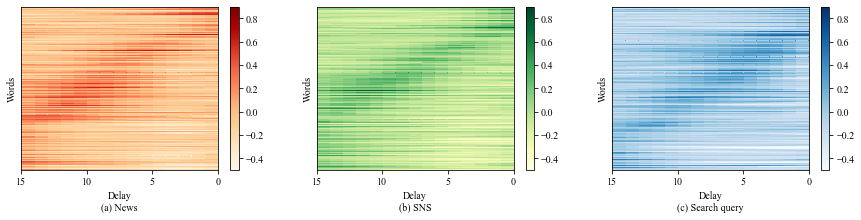

In [836]:
plt.rcParams.update({'font.size': 10})

fig, axs = plt.subplots(1, 3, figsize=(15, 3))

KR_news_pcm = axs[0].pcolormesh(KR_news_lag_sorted, cmap='OrRd', vmin=-0.5, vmax=0.9)
KR_sns_pcm = axs[1].pcolormesh(KR_sns_lag_sorted, cmap='YlGn', vmin=-0.5, vmax=0.9)
KR_trends_pcm = axs[2].pcolormesh(KR_trends_lag_sorted, cmap='Blues', vmin=-0.5, vmax=0.9)

fig.colorbar(KR_news_pcm, ax=axs[0])
fig.colorbar(KR_sns_pcm, ax=axs[1])
fig.colorbar(KR_trends_pcm, ax=axs[2])

x_names = ['Delay\n(a) News', 'Delay\n(b) SNS', 'Delay\n(c) Search query']
for col in range(3):
    axs[col].invert_xaxis()
#     axs[col].invert_yaxis()
    axs[col].set_xticks([0, 5, 10, 15])
    axs[col].set_yticks([])
    axs[col].set_xlabel(x_names[col])
    axs[col].set_ylabel('Words')
# plt.savefig('./image/v2/KR_word_time_delay.png', dpi=300, bbox_inches='tight')
plt.show()

In [693]:
# 사용된 단어들의 coef 평균 (국가별)

print('US:', US_trends_max_lag.loc['coef'].mean())
print('AU:', AU_trends_max_lag.loc['coef'].mean())
print('KR:', np.mean([KR_news_max_lag.loc['coef'].mean(), 
         KR_sns_max_lag.loc['coef'].mean(),
         KR_trends_max_lag.loc['coef'].mean()]))

US: 0.6584485967599903
AU: 0.5975889537471453
KR: 0.5681011085951118


In [721]:
US_trends_max_lag

,max_lag,coef
whooping cough,10.0,0.652670
flu bug,5.0,0.765800
flu vaccination,14.0,0.525269
flu vaccine,13.0,0.654765
flu vaccines,14.0,0.626757
influenza vaccine,14.0,0.558707
stomach bug,5.0,0.746000
flu mist,14.0,0.559115
colds,6.0,0.853243
nasal vaccine,14.0,0.539725


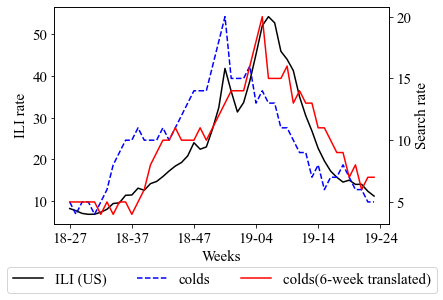

In [827]:
plt.rcParams.update({'font.size': 15})

lag = 6
target_word = 'colds'

fig, ax1 = plt.subplots()
ili_org = ax1.plot(CDC_scaler.inverse_transform(np.array(US_target_truth).reshape(-1, 1)[:50]), c='k', label='ILI (US)')
ax2 = ax1.twinx()
tmp1 = US_trends[(US_trends['weeks'] >= '18-' + str(start_week - lag).zfill(2))
          & (US_trends['weeks'] <= '20-' + str(21-lag-1).zfill(2))][target_word].values[:50]
tmp2 = US_trends[(US_trends['weeks'] >= '18-' + str(start_week).zfill(2))
          & (US_trends['weeks'] <= '20-' + str(21).zfill(2))][target_word].values[:50]
wd_org = ax2.plot(tmp2, c='blue', label='colds', ls='--')
wd_delay = ax2.plot(tmp1, c='red', label='colds(6-week translated)')

ax1.set_xticks([0, 10, 20, 30, 40, 50])
ax1.set_xticklabels(ticks_weeks[[0, 10, 20, 30, 40, 50]])

ax1.set_ylabel('ILI rate')
ax2.set_ylabel('Search rate')

ax1.set_xlabel('Weeks')

fig.legend(loc='lower center', bbox_to_anchor=(0.5,-0.35), bbox_transform=ax1.transAxes, ncol=3)
plt.savefig('./image/v2/US_delay_example(colds).png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
KR_trends_words_num_by_coef = []
threshold_coef_range = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

for threshold_coef in threshold_coef_range:
    tmp = []
    for word, (max_lag, coef) in KR_trends_lag_coef.items():
        if coef < threshold_coef:
            continue
        tmp.append((word, max_lag, coef))        
    KR_trends_words_num_by_coef.append(len(tmp))


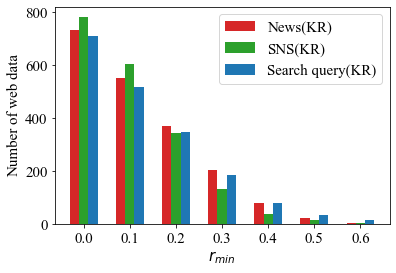

In [812]:
plt.rcParams.update({'font.size': 15})

coef_x_ticks = ['0.0', '0.1', '0.2', '0.3', '0.4', '0.5', '0.6']
x_index = np.arange(0, 7)
bar_width = 0.2

plt.bar(x_index-bar_width, KR_news_words_num_by_coef,
        bar_width, label='News(KR)', color='tab:red')
plt.bar(x_index, KR_sns_words_num_by_coef,
        bar_width, label='SNS(KR)', color='tab:green')
plt.bar(x_index+bar_width, KR_trends_words_num_by_coef,
        bar_width, label='Search query(KR)', color='tab:blue')

plt.xticks(x_index, coef_x_ticks)
plt.ylabel('Number of web data')
plt.xlabel('$r_{min}$')
plt.legend()
plt.savefig('./image/v2/KR_threshold_coef.png', dpi=300, bbox_inches='tight')
plt.show()

In [462]:
print('news:',  KR_news_words_num_by_coef)
print('sns:', KR_sns_words_num_by_coef)
print('trends:', KR_trends_words_num_by_coef)

news: [732, 553, 371, 206, 81, 22, 5]
sns: [782, 605, 345, 134, 37, 15, 5]
trends: [709, 519, 349, 187, 78, 34, 15]
